# Futures Trend Following Portfolio

    1. The Security closes with 50/100 ma > 0, buy.
    2. If the Security closes 50/100 ma < 0, sell your long position.
    
    (For a Portfolio of futures.)
    
    NOTE: pinkfish does not yet have full support for futures backtesting, and
    the futures data from yahoo finance isn't very good.

In [1]:
import datetime

import matplotlib.pyplot as plt
import pandas as pd

import pinkfish as pf
import strategy

# Format price data.
pd.options.display.float_format = '{:0.2f}'.format
pd.set_option('display.max_rows', None)

%matplotlib inline

In [2]:
# Set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

### MICRO FUTURES

In [3]:
# symbol: (description, multiplier)

micro_futures = {
    'MES=F': 'Micro E-mini S&P 500 Index Futures',
    'MNQ=F': 'Micro E-mini Nasdaq-100 Index Futures',
    'M2K=F': 'Micro E-mini Russell 2000 Index Futures',
    'MYM=F': 'Micro E-mini Dow Jones Futures',
    'MGC=F': 'Micro Gold Futures',
    'SIL=F': 'Micro Silver Futures',
    'M6A=F': 'Micro AUD/USD Futures',
    'MSF=F': 'Micro CHF/USD Futures',
    'MCD=F': 'Micro CAD/USD Futures',
    'MSF=F': 'Micro CHF/USD Futures',
    'M6E=F': 'Micro EUR/USD Futures',
    'M6B=F': 'Micro GBP/USD Futures',
    'MIR=F': 'Micro INR/USD Futures'
}

symbols = list(micro_futures)
#symbols = ['MES=F']
capital = 100_000
start = datetime.datetime(1900, 1, 1)
end = datetime.datetime.now()

In [4]:
options = {
    'use_adj' : False,
    'use_cache' : True,
    'sell_short' : False,
    'force_stock_market_calendar' : True,
    'margin' : 2,
    'sma_timeperiod_slow': 50,
    'sma_timeperiod_fast': 10,
    'use_vola_weight' : True
}

Run Strategy

In [5]:
s = strategy.Strategy(symbols, capital, start, end, options=options)
s.run()




View log DataFrames: raw trade log, trade log, and daily balance

In [6]:
s.rlog.head()

,date,seq_num,price,shares,entry_exit,direction,symbol
0,2019-07-16,0,1411.20,5,entry,LONG,MGC=F
1,2019-07-16,1,0.77,29877,entry,LONG,MCD=F
2,2019-07-16,2,15.60,422,entry,LONG,SIL=F
3,2019-07-16,3,3007.00,5,entry,LONG,MES=F
4,2019-07-16,4,1.02,14698,entry,LONG,MSF=F


In [7]:
s.tlog.head()

,entry_date,entry_price,exit_date,exit_price,pl_points,pl_cash,qty,cumul_total,direction,symbol
0,2019-07-16,1.13,2019-07-24,1.12,-0.01,-153.75,19712,-153.75,LONG,M6E=F
1,2019-07-16,0.70,2019-08-01,0.68,-0.02,-510.28,24070,-664.04,LONG,M6A=F
2,2019-07-16,145.42,2019-08-05,139.89,-5.53,-1410.15,255,-2074.19,LONG,MIR=F
3,2019-07-16,0.77,2019-08-08,0.76,-0.01,-301.76,29877,-2375.94,LONG,MCD=F
4,2019-07-16,1565.50,2019-08-08,1534.10,-31.40,-188.40,6,-2564.35,LONG,M2K=F


In [8]:
s.dbal.tail()

,high,low,close,shares,cash,leverage,state
date,,,,,,,
2023-07-26,101088.53,101088.53,101088.53,96717,-70510.23,1.70,-
2023-07-27,99593.00,99593.00,99593.00,96717,-70510.23,1.71,-
2023-07-28,99950.37,99950.37,99950.37,96717,-70510.23,1.71,-
2023-07-31,100324.65,100324.65,100324.65,96717,-70510.23,1.70,-
2023-08-01,99559.23,99559.23,99559.23,0,99559.23,1.00,X


Generate strategy stats - display all available stats

In [9]:
pf.print_full(s.stats)

start                                                  2019-07-16
end                                                    2023-08-01
beginning_balance                                          100000
ending_balance                                           99559.23
total_net_profit                                          -440.77
gross_profit                                             33863.33
gross_loss                                              -34304.09
profit_factor                                                0.99
return_on_initial_capital                                   -0.44
annual_return_rate                                          -0.11
trading_period                           4 years 0 months 16 days
pct_time_in_market                                          93.80
margin                                                          2
avg_leverage                                                 1.23
max_leverage                                                 1.91
min_levera

View Performance by Symbol

,cumul_total,weight,pct_cumul_total,relative_performance
MGC=F,"$2,101.40",0.08,-4.77,-57.21
MYM=F,$0.00,0.08,-0.00,-0.00
MCD=F,"-$1,487.01",0.08,3.37,40.48
SIL=F,"$2,553.97",0.08,-5.79,-69.53
M6B=F,"$1,407.84",0.08,-3.19,-38.33
MES=F,"$2,833.00",0.08,-6.43,-77.13
MSF=F,-$24.70,0.08,0.06,0.67
M6E=F,-$421.48,0.08,0.96,11.48
M6A=F,"-$1,483.17",0.08,3.36,40.38
MNQ=F,$349.00,0.08,-0.79,-9.50


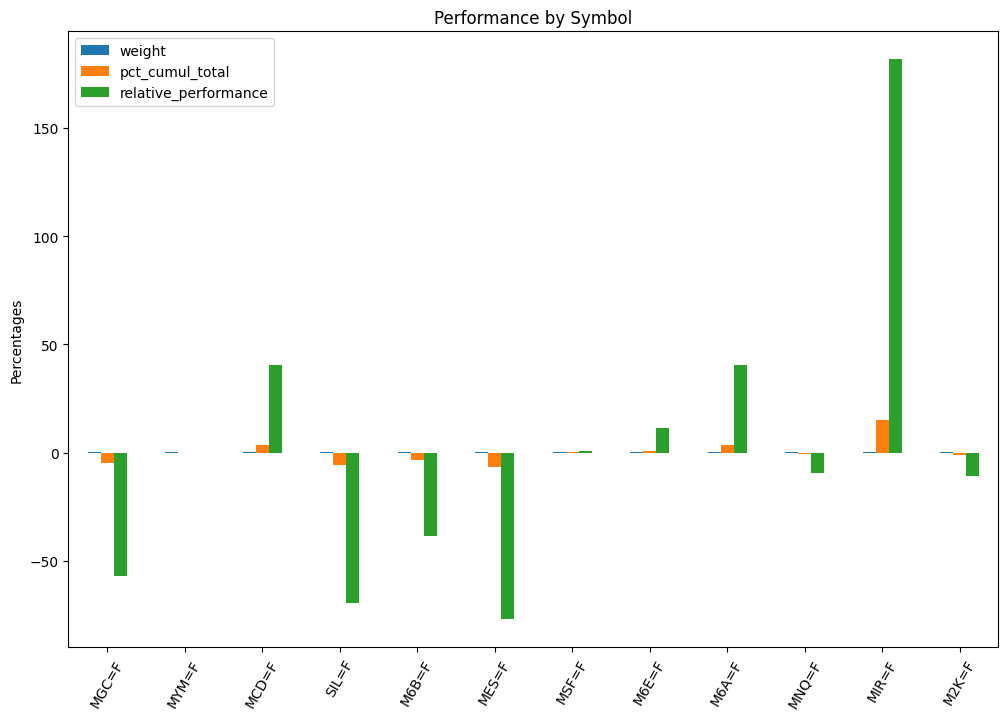

In [10]:
weights = {symbol: 1 / len(symbols) for symbol in symbols}
totals = s.portfolio.performance_per_symbol(weights=weights)
totals

,MGC=F,MYM=F,MCD=F,SIL=F,M6B=F,MES=F,MSF=F,M6E=F,M6A=F,MNQ=F,MIR=F,M2K=F
MGC=F,1.00,0.06,0.25,0.79,0.31,0.08,0.41,0.34,0.36,0.09,0.14,0.09
MYM=F,0.06,1.00,0.43,0.17,0.29,0.96,0.02,0.16,0.39,0.81,0.35,0.88
MCD=F,0.25,0.43,1.00,0.36,0.60,0.43,0.42,0.52,0.75,0.36,0.40,0.45
SIL=F,0.79,0.17,0.36,1.00,0.34,0.18,0.37,0.33,0.42,0.17,0.15,0.21
M6B=F,0.31,0.29,0.60,0.34,1.00,0.31,0.57,0.68,0.69,0.29,0.36,0.31
MES=F,0.08,0.96,0.43,0.18,0.31,1.00,0.06,0.18,0.41,0.93,0.36,0.89
MSF=F,0.41,0.02,0.42,0.37,0.57,0.06,1.00,0.78,0.53,0.08,0.21,0.04
M6E=F,0.34,0.16,0.52,0.33,0.68,0.18,0.78,1.00,0.63,0.19,0.33,0.19
M6A=F,0.36,0.39,0.75,0.42,0.69,0.41,0.53,0.63,1.00,0.38,0.40,0.43
MNQ=F,0.09,0.81,0.36,0.17,0.29,0.93,0.08,0.19,0.38,1.00,0.33,0.79


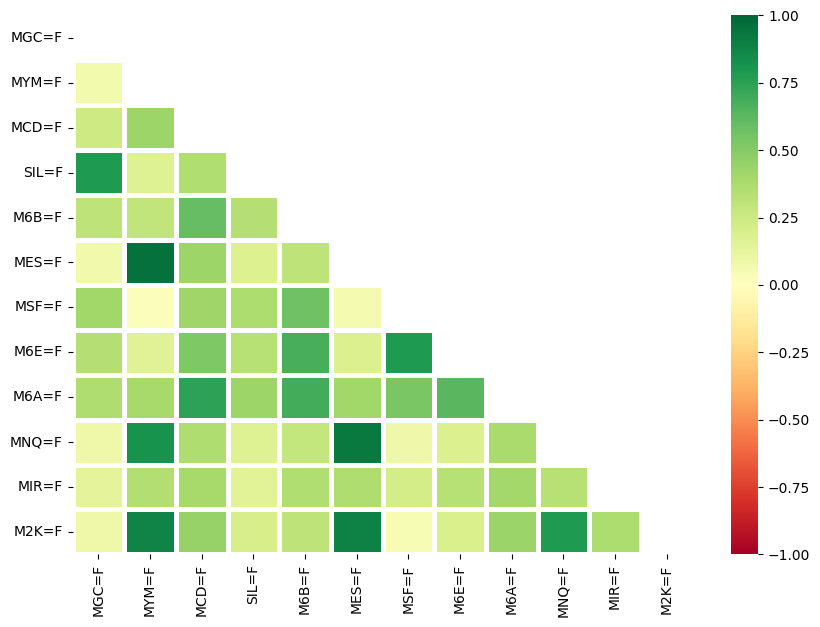

In [11]:
corr_df = s.portfolio.correlation_map(s.ts)
corr_df

Run Benchmark, Retrieve benchmark logs, and Generate benchmark stats

In [12]:
benchmark = pf.Benchmark('SPY', s.capital, s.start, s.end, use_adj=True)
benchmark.run()

Plot Equity Curves: Strategy vs Benchmark

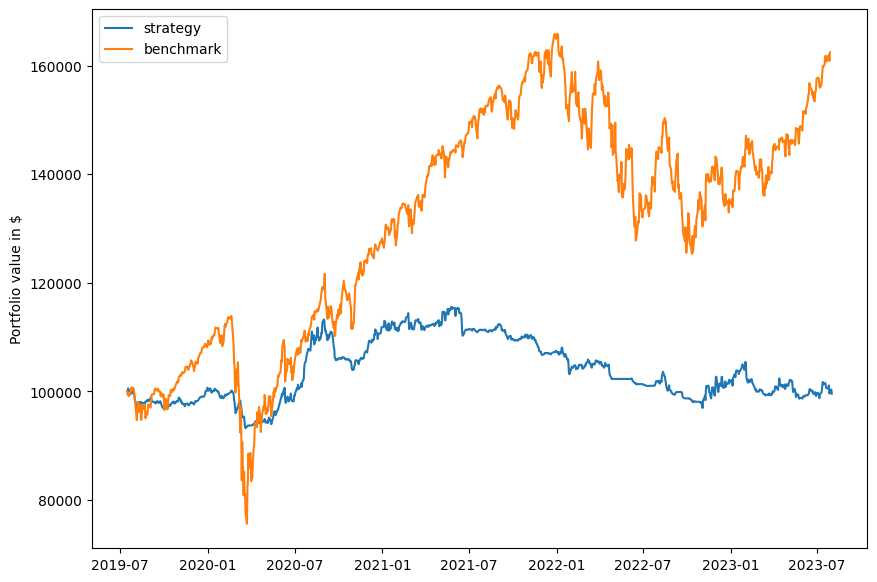

In [13]:
pf.plot_equity_curve(s.dbal, benchmark=benchmark.dbal)

Bar Graph: Strategy vs Benchmark

,strategy,benchmark
annual_return_rate,-0.11,12.79
max_closed_out_drawdown,-16.11,-33.64
annualized_return_over_max_drawdown,0.01,0.38
best_month,10.55,22.99
worst_month,-6.84,-30.91
sharpe_ratio,0.02,0.65
sortino_ratio,0.03,0.79
monthly_std,2.30,5.67
annual_std,9.40,19.90


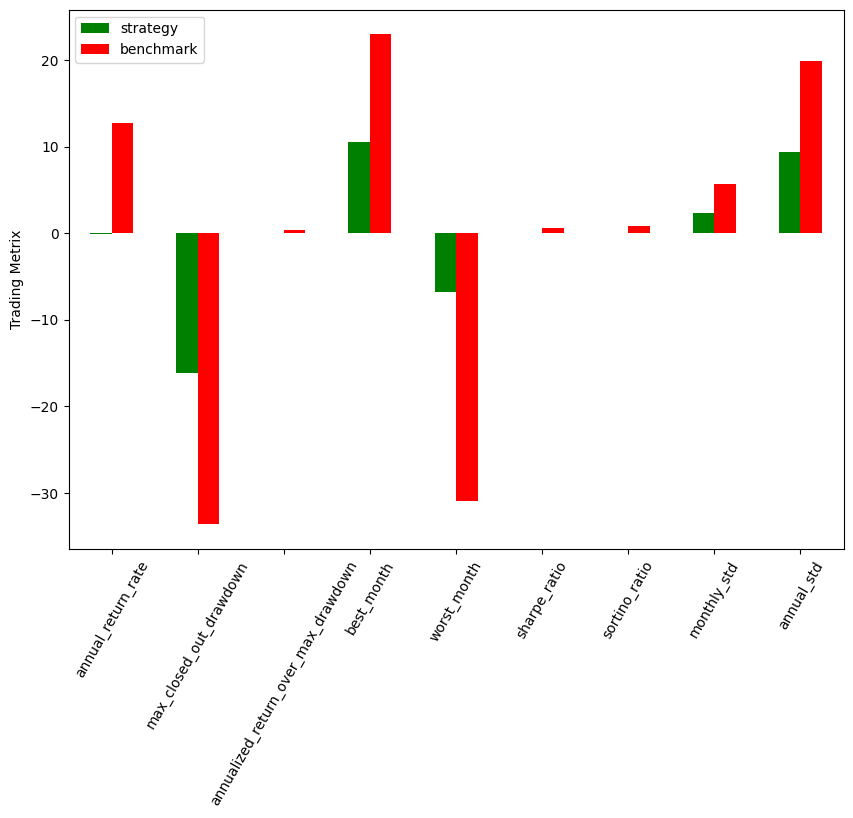

In [14]:
df = pf.plot_bar_graph(s.stats, benchmark.stats)
df

Analysis: Kelly Criterian

In [15]:
kelly = pf.kelly_criterion(s.stats, benchmark.stats)
kelly

sharpe_ratio             0.02
sharpe_ratio_max         0.12
sharpe_ratio_min        -0.07
strategy risk            0.09
instrument risk          0.20
optimal target risk      0.02
half kelly criterion     0.01
aggressive leverage      0.12
moderate leverage        0.06
conservative leverage   -0.18
dtype: float64